In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\Bhushan Sangle\\Downloads\\Python_EDA\\Python_EDA\\walmart-sales-dataset-of-45stores.csv')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [43]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [44]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [45]:
df.shape

(6435, 8)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#from the given info
#1.The store,holiday flag are int datatype
#2. Date is object
#3.Others are in float
# there no column which has null value so we dont need to clean it.

In [95]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [73]:
total_sales=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [74]:
pd.DataFrame(total_sales).head(1)


,Weekly_Sales
Store,
20,301397792.0


In [ ]:
# we got know which store has max sales

In [65]:
total_sales=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [66]:
pd.DataFrame(total_sales).tail(1)


,Weekly_Sales
Store,
33,37160222.0


In [ ]:
# here we can see the store number which has min sales in week

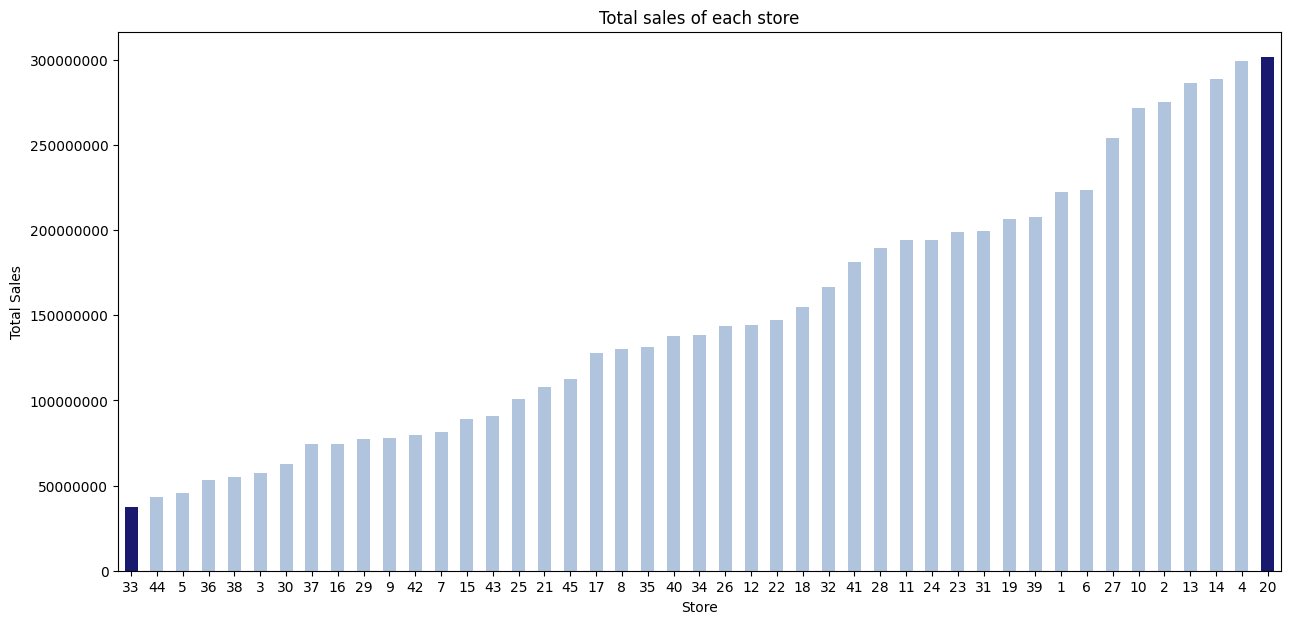

In [96]:
plt.figure(figsize=(15,7))
total_sales_for_each_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) 

ax = total_sales_for_each_store.plot(kind='bar',color=clrs)

plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales of each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');


In [ ]:
# with help of bar group we can clerly see all the store sales

In [128]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5658.000000,5.658000e+03,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000
mean,22.268293,1.060944e+06,0.069459,60.290530,3.337920,176.309343,7.623162
std,13.054547,5.767350e+05,0.254256,18.305706,0.457773,38.878400,1.097967
min,1.000000,2.099862e+05,0.000000,10.090000,2.472000,126.064000,4.584000
25%,11.000000,5.540509e+05,0.000000,46.942500,2.886000,133.370143,6.885000
50%,22.000000,9.648928e+05,0.000000,62.390000,3.417000,190.962917,7.806000
75%,33.000000,1.453294e+06,0.000000,74.477500,3.720000,214.226679,8.433000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,9.966000


<Axes: >

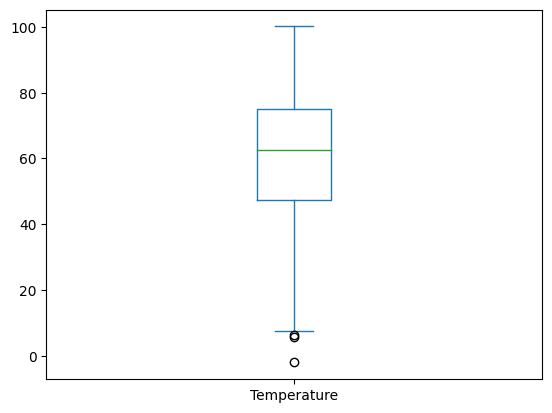

In [98]:
df['Temperature'].plot(kind='box')

In [125]:
df=df[df['Temperature']>10]

In [ ]:
# so as we seen describe there no outliner in any columns except temperature
# In temp data the min value was -2 so that was outlier, we can see that in boxplot
# so we start our temp from 10,then outlier removed 

<Axes: >

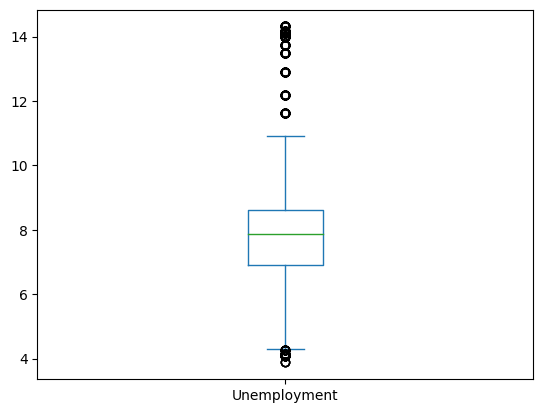

In [100]:
df['Unemployment'].plot(kind='box')

In [127]:
df=df[(df['Unemployment']<10) & (df['Unemployment']>4.5)]

In [ ]:
# we have one more outlier in Unemployment , so we filter the data now it is in between 4.5 to 10

In [91]:
#for Store
  1.The attributes means the numbers of store in walmart
  2.There are total 45 store
#for Weekly_sales
  1.The attributes means the sale per week in store
  2.So the max sale is 381868.6 & the min sale is 20998.6 i.e there is usage diff between max & min sales
#for temp
  1. The max temp is 100.14 & min temp 10 i.e the the temp diff is so large
#for fule price
  1.The max price is 4.46 & min price is 2.47 i.e the 25% of price is greter than min price
#for CPI
 1. The attributes means Consumer Price Index
 2. The max CPI is 227.23 & min is 126.06 
 3. The mean of CPI is 171.57 which is greter than min value
# for unemployment
 1.The max unemployment is 14.31 & min is 4.5
 2. The 50% of the unemplyoment is half of the max unemplyoment.

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [ ]:
### Univariate Analysis ###

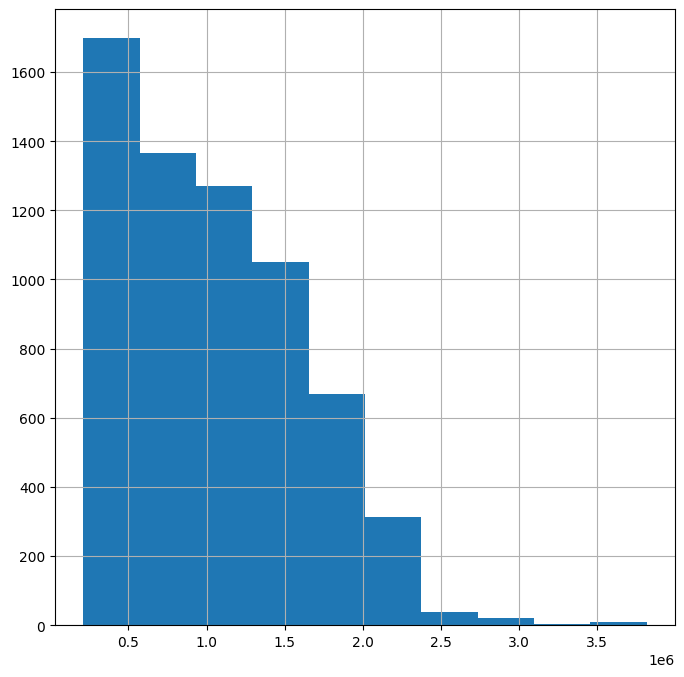

In [40]:
data['Weekly_Sales'].hist(figsize=(8,8))
plt.show()

In [ ]:
# Histogram of Weekly Sales
there are max sales is more week
there are very min is less week

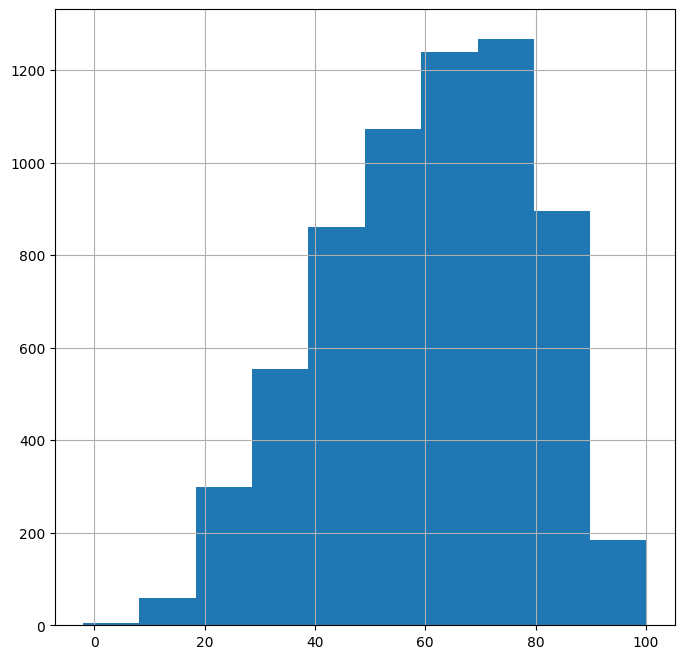

In [71]:
data['Temperature'].hist(figsize=(8,8))
plt.show()

In [ ]:
# Histogram of temp
 In this data the Temp atrribute varies within the range of -2 to 100.
 The most of the week the temp are between 60 to 80.
 There are also few week where thw temp in between -2 to 20.

     

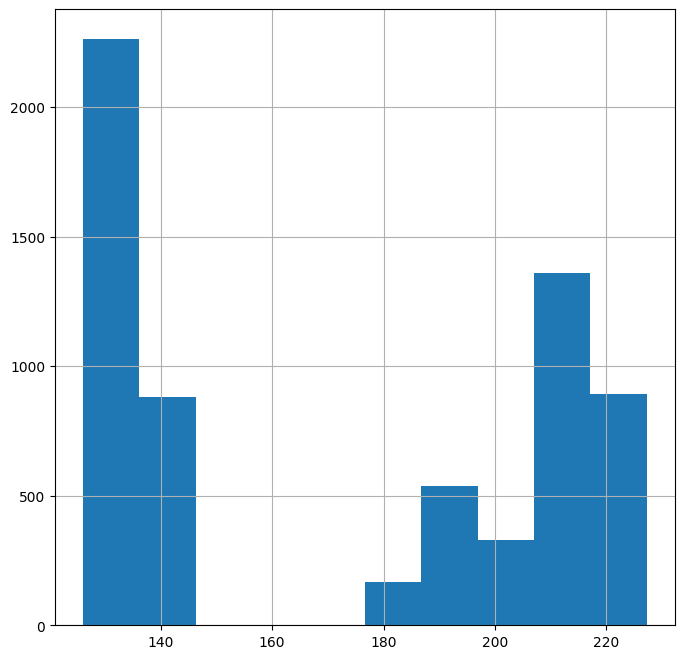

In [51]:
data['CPI'].hist(figsize=(8,8))
plt.show()

In [ ]:
# Histogram of CPI
In this data the CPI atrribute varies within the range of 120 to 145 after that no value in between then again from 175 to 225.
There are max week the CPI is around 120 to 145
There are very few week the CPI are around 180.

In [50]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day


Text(0.5, 1.0, 'Monthwise Sales')

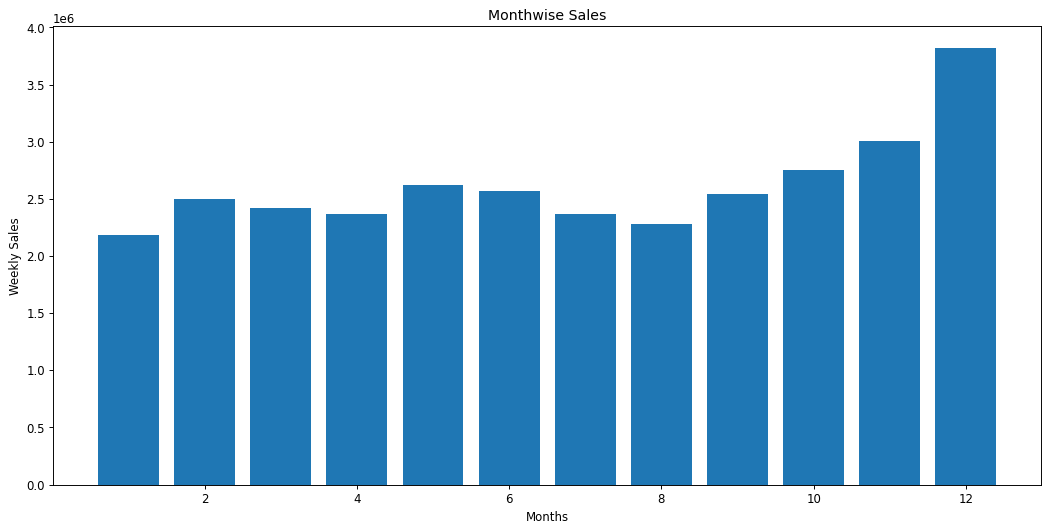

In [51]:
plt.figure(figsize=(15,7), dpi=85)
plt.bar(df['month'],df['Weekly_Sales'])
plt.xlabel('Months') 
plt.ylabel('Weekly Sales')
plt.title('Monthwise Sales')


In [ ]:
# From the above bar graph we can see Dec is the month where sales were max

Text(0.5, 1.0, 'yearwise Sales')

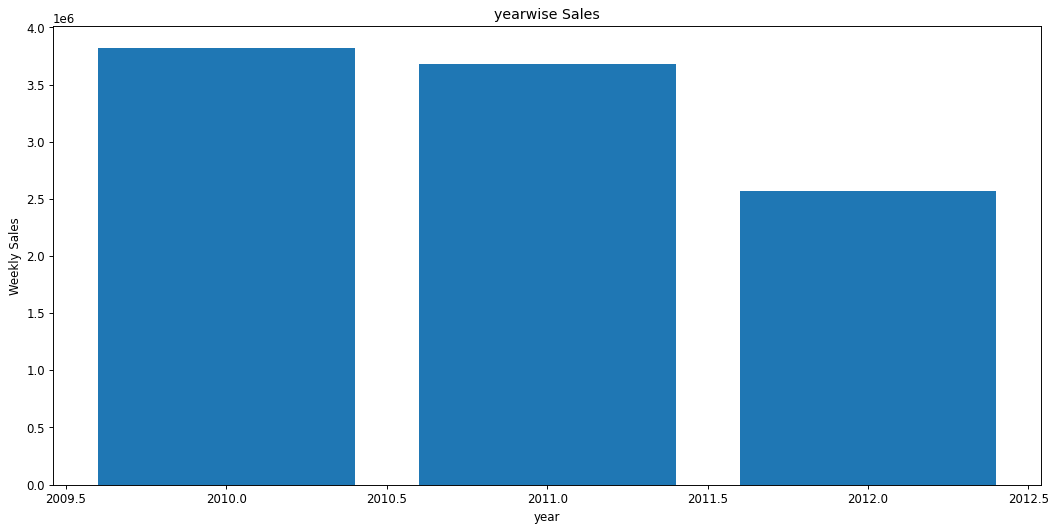

In [52]:
plt.figure(figsize=(15,7), dpi=85)
plt.bar(df['year'],df['Weekly_Sales'])
plt.xlabel('year') 
plt.ylabel('Weekly Sales')
plt.title('yearwise Sales')


In [ ]:
# The 2010 year has max sales after that 2011 and the min sales at 2012 year.

In [ ]:
## Bivariate analysis ##

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

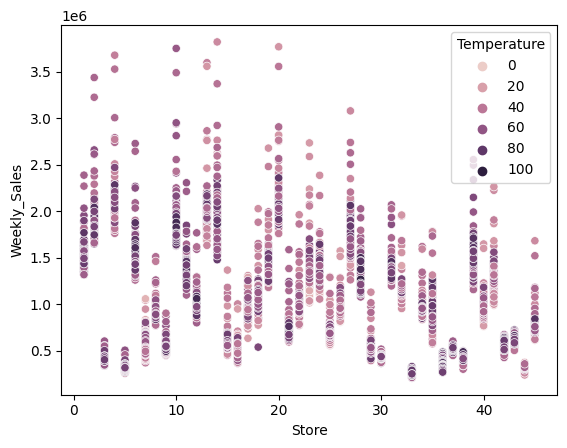

In [8]:
sns.scatterplot(data=data, x="Store", y="Weekly_Sales",hue="Temperature")

In [ ]:
# when temp is in between 20 to 60 the become high
# when temp ih high around 80 to 100 the sales become low


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

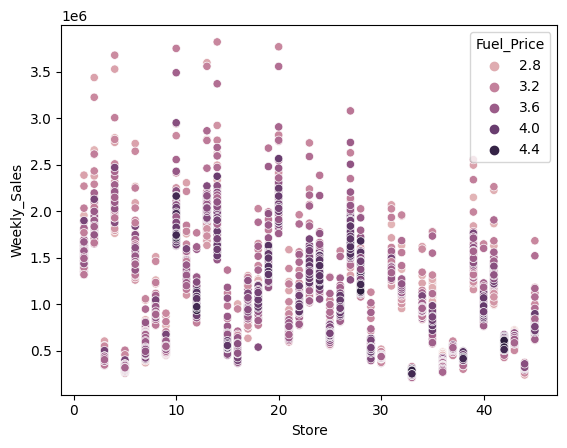

In [11]:
sns.scatterplot(data=data, x="Store", y="Weekly_Sales",hue="Fuel_Price")

In [ ]:
# This polt shows when fuel price decrease the sales increase that week

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

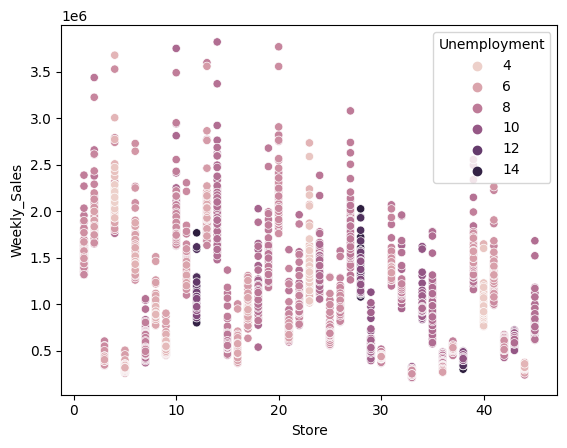

In [12]:
sns.scatterplot(data=data, x="Store", y="Weekly_Sales",hue="Unemployment")

In [ ]:
# Here we can see whenever the sales is high that week the less unempolyment is there.
it means tha when unempolyment is less the sale increase
ex- we know the store 20 has max sales 

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

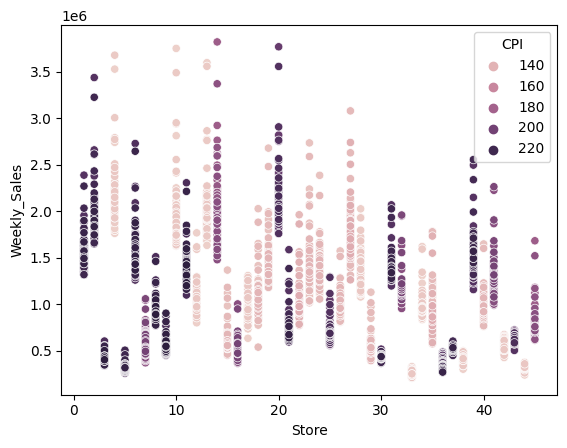

In [13]:
sns.scatterplot(data=data, x="Store", y="Weekly_Sales",hue="CPI")

In [ ]:
# CPI is the Consumer Price Index measures the monthly change in prices paid by U.S. consumers
# here we see particular store has has less sales then the CPI index also less
# as we know the store 20 has max sales that is why it also has the max CPI 
# so as the store 33 has less sales the CPI is also min.

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

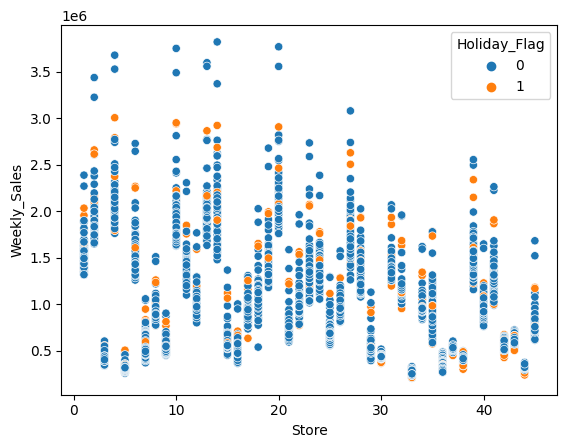

In [14]:
sns.scatterplot(data=data, x="Store", y="Weekly_Sales",hue="Holiday_Flag")

In [ ]:
# here 0 indicate non holidays week & 1 indicates holidays week
# so we can clearly see that whenever  the highest sales then there is non holidays week. 

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

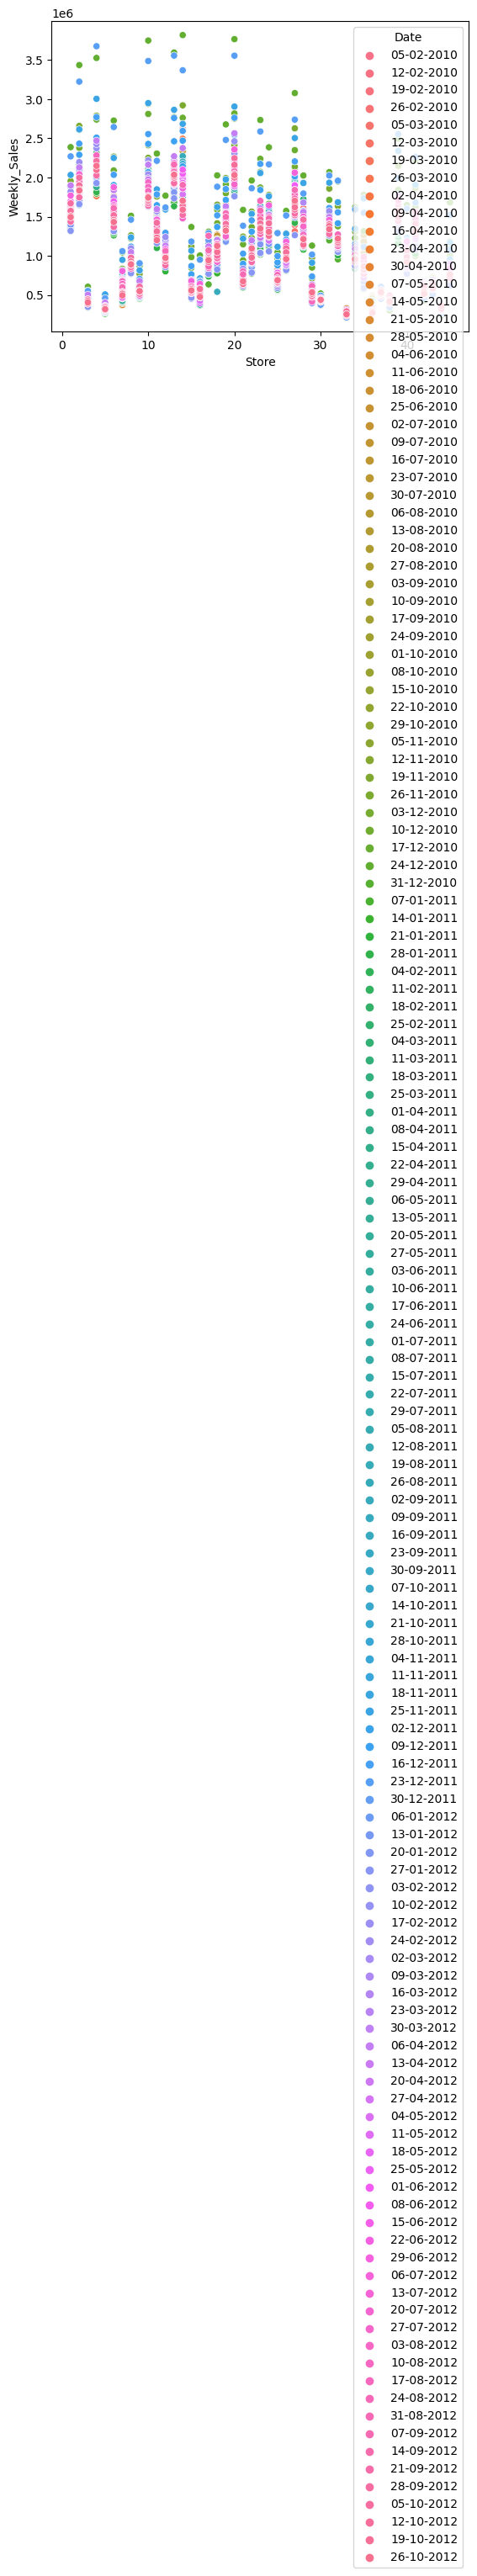

In [15]:
sns.scatterplot(data=data, x="Store", y="Weekly_Sales",hue="Date")

In [ ]:
# the green colour points refer to 2012,blue to 2011 , so as per polt the max_price sale is in between 2012 & 2011 year.
# we can see in 2010 sales are always in modrate level it will never goes high but is max number of times therefore the 
total sales is more in 2010.

In [ ]:
### Conclusion of Complete EDA ###


*** Outliers Summary***
1. Temperature data has min value as -2(rare) it was an outlier so we increase that value to 10
2. Unemployment data has min value & ma value different outlier(which is rare) so we collect it in between 4.5 to 10


***Conclusion***
1.The dataset has total 45 store from them the store 20 has max sales & store 33 has min sales
2.The CPI data columns is not balance.atrribute varies within the range of 120 to 145 after that no value in between
then again from 175 to 225.
3.The month Dec has max sales with campare to other months
4.In our data we have 3 years value, where the 2010 year has max sales then 2011 & 2012 has min sales campare to 2010.
5.when temp is in between 20 to 60 the become high. when temp ih high around 80 to 100 the sales become low
6. when fuel price decrese the sales increase that week
7. whenever the sales is high that week the less unempolyment is there.
8.  the store 20 has max sales that is why it also has the max CPI, as the store 33 has less sales the CPI is also min.
9. whenever the highest sales then there is non holidays week. 
10. the max_price sale is in between 2012 & 2011 year.In 2010 sales are always in modrate level it will never goes
   high but is max number of times therefore the total sales is more in 2010.
    
*** 
now we can see that our all columns affect on our stores weekly sales.